In [34]:

# import the necessary packages
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
import scipy.signal as sp
# construct the argument parse and parse the argument--------not required now

In [152]:
# load the image from disk
image = cv2.imread("/home/pruthvirg/Desktop/220.png")
cv2.imshow("original image", image)

angle = -40
rotated = imutils.rotate_bound(image, angle)
cv2.imwrite("vertical_image.png",rotated)
cv2.imshow("Rotated (Correct)", rotated)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [153]:
img_gray = cv2.imread('vertical_image.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow("see what weve got", img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [154]:
rows,cols = img_gray.shape[:2]

In [155]:
l = list(img_gray)

In [156]:
ratio_list = []
for i in range(0,rows):
    white_count = 0
    for j in range(0,cols):
        if l[i][j]>0:
            white_count = white_count+1
    ratio_list.append(white_count/cols)
           

In [157]:
l

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

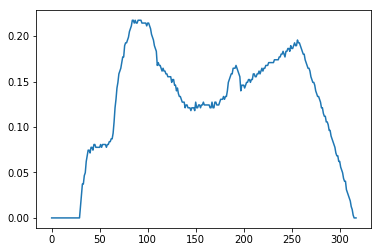

In [158]:
plt.plot(ratio_list)

In [159]:
z = sp.savgol_filter(ratio_list, 31, 1)

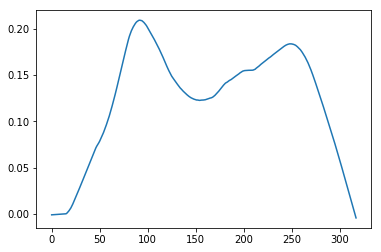

In [163]:
plt.plot(z)

In [164]:
k=sp.argrelextrema(z,np.less)

In [165]:
print(k)

(array([154, 157, 205]),)


In [166]:
final_local_minima = k[0].mean()

In [167]:
final_local_minima = int(final_local_minima)

In [168]:
final_local_minima 

172

In [169]:
palm_matrix = img_gray[0:final_local_minima]
forearm_matrix = img_gray[final_local_minima:]

In [170]:
cv2.imshow("palm",palm_matrix)
cv2.waitKey(0)
cv2.destroyAllWindows()


cv2.imshow("forearm",forearm_matrix)
cv2.waitKey(0)
cv2.destroyAllWindows()
